## ARIMA 모델 구현하기

In [13]:
# 경고 문구 없애기
import warnings
warnings.filterwarnings('ignore') 

### 1. 데이터 분할하기

In [14]:
import yfinance as yf

start_date = '2019-01-01'
end_date = '2024-08-31'
data = yf.download('USDKRW=X',start=start_date, end=end_date)
df = data[["Close"]]

# 데이터 분할
train = df[:'2024-08-01']
test = df['2024-08-01':]

[*********************100%%**********************]  1 of 1 completed

### 2. ARIMA 모델 구현하기(ARIMA(1,1,1))

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# ARIMA 모델 적합 (p, d, q 파라미터 설정)
model = ARIMA(train['Close'], order=(1, 1, 1))  # (p, d, q) 파라미터 설정
model_fit = model.fit()

# 10일 동안 예측 수행
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)
forecast

1457    1368.991387
1458    1368.580049
1459    1368.737981
1460    1368.677344
1461    1368.700625
1462    1368.691686
1463    1368.695118
1464    1368.693801
1465    1368.694307
1466    1368.694112
Name: predicted_mean, dtype: float64

### 3. 최적츼 ARIMA 모델 찾기

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# 최적 ARIMA 모델 찾기
def evaluate_models(df, p_values, d_values, q_values):
    best_aic = np.inf
    best_pdq = None
    best_model = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(train['Close'], order=(p, d, q))
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_pdq = (p, d, q)
                        best_model = model_fit
                    print(f'ARIMA({p},{d},{q}) - AIC: {aic}')
                except Exception as e:
                    print(f'ARIMA({p},{d},{q}) - Exception: {e}')
                    continue
    
    return best_model, best_pdq

# p, d, q 범위 설정
p_values = range(0, 3)  # 자기회귀 차수
d_values = range(0, 3)  # 차분 차수
q_values = range(0, 3)  # 이동평균 차수

# 최적 모델 평가
best_model, best_pdq = evaluate_models(df, p_values, d_values, q_values)
print(f'ARIMA{best_pdq} with AIC: {best_model.aic}')


ARIMA(0,0,0) - AIC: 17179.593696952328
ARIMA(0,0,1) - AIC: 15305.217382828821
ARIMA(0,0,2) - AIC: 13975.476195422936
ARIMA(0,1,0) - AIC: 9719.271036876296
ARIMA(0,1,1) - AIC: 9714.961292862834
ARIMA(0,1,2) - AIC: 9716.601857638761
ARIMA(0,2,0) - AIC: 10813.60519064068
ARIMA(0,2,1) - AIC: 9721.931598016085
ARIMA(0,2,2) - AIC: 9717.597451207785
ARIMA(1,0,0) - AIC: 9733.880970527207
ARIMA(1,0,1) - AIC: 9729.877799973703
ARIMA(1,0,2) - AIC: 9731.478552425102
ARIMA(1,1,0) - AIC: 9714.75961025278
ARIMA(1,1,1) - AIC: 9715.99089916608
ARIMA(1,1,2) - AIC: 9717.990147614853
ARIMA(1,2,0) - AIC: 10313.146552752434
ARIMA(1,2,1) - AIC: 9717.392155388266
ARIMA(1,2,2) - AIC: 9723.80026305367
ARIMA(2,0,0) - AIC: 9729.641940792688
ARIMA(2,0,1) - AIC: 9730.813242627071
ARIMA(2,0,2) - AIC: 9732.806945898876
ARIMA(2,1,0) - AIC: 9716.38794976422
ARIMA(2,1,1) - AIC: 9717.990306613254
ARIMA(2,1,2) - AIC: 9708.05147663087
ARIMA(2,2,0) - AIC: 10159.968895371909
ARIMA(2,2,1) - AIC: 9719.024092364449
ARIMA(2,2,2)

### 4. AIC가 제일 낮은 모델로 ARIMA모델 예측하기(ARIMA(2,1,2))

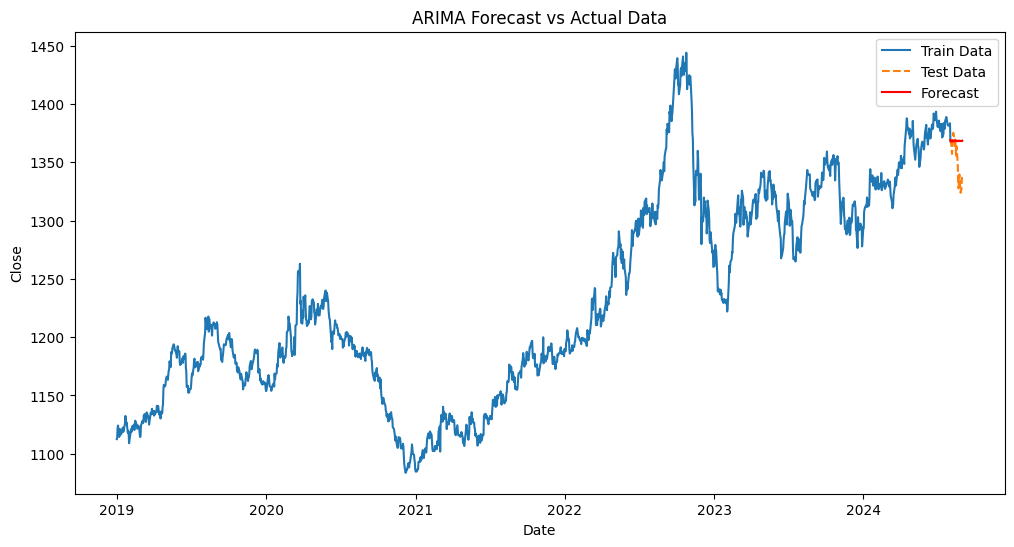

,Forecast
Date,
2024-08-01,1368.980598
2024-08-02,1367.758966
2024-08-05,1368.424965
2024-08-06,1368.622093
2024-08-07,1367.785782
2024-08-08,1368.702206
2024-08-09,1368.238052
2024-08-12,1368.044047
2024-08-13,1368.700560


In [17]:
if best_model:
     # 예측 수행
    forecast_steps = len(test)
    forecast = best_model.forecast(steps=forecast_steps)
    
    # 결과 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['Close'], label='Train Data')
    plt.plot(test.index, test['Close'], label='Test Data', linestyle='--')
    plt.plot(test.index, forecast, label='Forecast', color='red')
    plt.title('ARIMA Forecast vs Actual Data')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.show()
    # 예측 결과 출력
    forecast_df = pd.DataFrame({'Date': test.index, 'Forecast': forecast})
    forecast_df.set_index('Date',inplace=True)
forecast_df


### 5. 실제값과 비교하기

In [18]:
forecast_df["test"] = test["Close"]
forecast_df
from sklearn.metrics import mean_squared_error
# MSE 계산
mse = mean_squared_error(forecast_df['test'], forecast_df['Forecast'])
rmse = np.sqrt(mse)
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')


MSE: 619.5919
RMSE: 24.8916


### 6. 잔차 검증하기

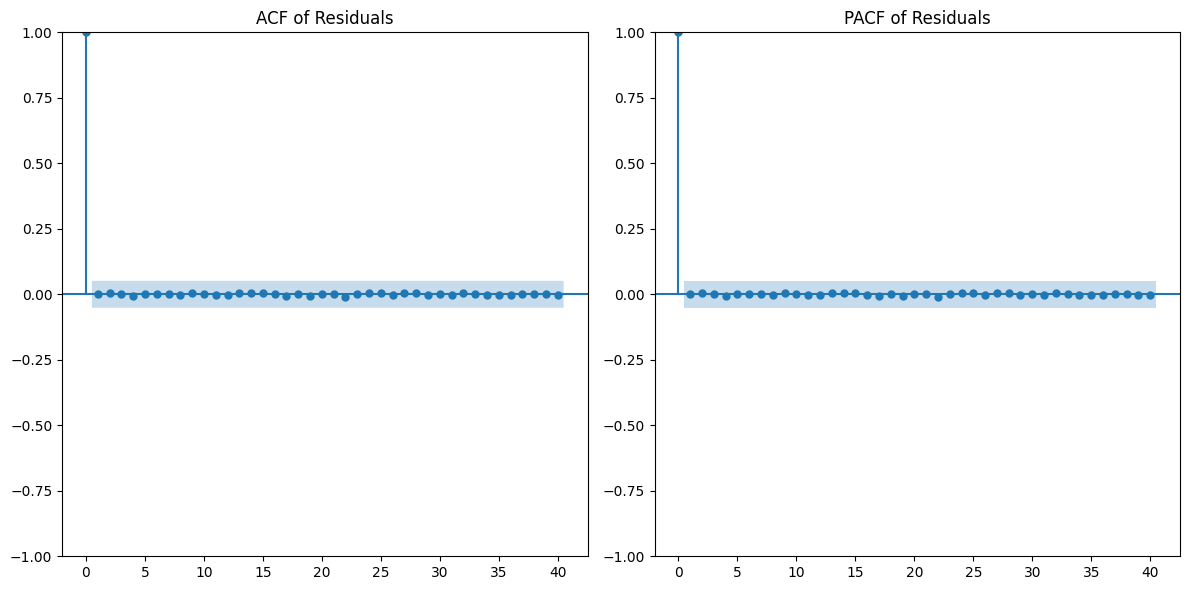

,lb_stat,lb_pvalue
10,0.212277,1.0


In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as stats

# 잔차 추출
residuals = model_fit.resid
residuals.dropna(inplace=True)

# 잔차의 ACF 및 PACF 그래프
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, lags=40, ax=plt.gca(), title='ACF of Residuals')
plt.subplot(122)
plot_pacf(residuals, lags=40, ax=plt.gca(), title='PACF of Residuals')
plt.tight_layout()
plt.show()

# Ljung-Box 검정
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
lb_test 
